# LEARNING OBJECTIVE

This notebook shows how to plot a planar velocity field given in polar coordinates (that is, the radial and azimuthal velocity components are given instead of the horizontal and vertical ones).

# PRELIMINARIES

[run the next cell to setup Python environment customizations and load packages]

In [1]:
# interactive plots setup
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# sympy setup
import sympy as sp
sp.init_printing()
from sympy.vector import *

# ploting customizations
from matplotlib import pyplot as plt
size=16
params = {'legend.fontsize': 'large',
#          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.875,
          'ytick.labelsize': size*0.875,
          'axes.titlepad': 25}
plt.rcParams.update(params)
%matplotlib inline

# numerics
import numpy as np

# for Colab only: to save plots as files and download them
#from google.colab import files

## Credit

Initial version written by [Ivan C. Christov](http://christov.tmnt-lab.org), Purdue University.

# VELOCITY FIELD GIVEN IN POLAR COORDINATES

Consider ideal flow past a cylinder of constant radius $r_0$. An example of such flow, which is also steady and planar, has velocity components in cylindrical $(r,\theta,z)$ coordinates given by 
\begin{align*}
    v_r(r,\theta) &= U_0\cos\theta\left[ 1 - \left(\frac{r_0}{r}\right)^2 \right],\\
    v_\theta(r,\theta) &= -U_0\sin\theta\left[ 1 + \left(\frac{r_0}{r}\right)^2 \right],\\
    v_z(r,\theta) &= 0.
\end{align*}
The cylinder is assumed infinite in the $z$-direction out of the page. The free-stream uniform horizontal velocity far away from the cylinder is the constant $U_0$.

# TRANSFORMATION TO CARTESIAN COORDINATES

To convert the polar velocities, $v_r$ and $v_\theta$, to Cartesian ones, $v_x$ and $v_y$, for plotting we strat from the basic [polar](https://en.wikipedia.org/wiki/Polar_coordinate_system)-to-Cartesian transformation:
\begin{align*}
    x &= r \cos\theta,\\
    y &= r \sin\theta,
\end{align*}
and take a time derivative
\begin{align*}
    \frac{dx}{dt} &= \frac{d}{dt} (r \cos\theta) = \frac{dr}{dt} \cos\theta - r \sin\theta \frac{d\theta}{dt},\\
    \frac{dy}{dt} &= \frac{d}{dt} (r \sin\theta) = \frac{dr}{dt} \sin\theta + r \cos\theta \frac{d\theta}{dt}.
\end{align*}

By defintion, in Eulerian coordinates, $dx/dy=v_x$, $dy/dt=v_y$, $dr/dt = v_r$, and $d\theta/dt = v_\theta$, hence
\begin{align*}
    v_x &= v_r \cos\theta - v_\theta ~ r \sin\theta,\\
    v_y &= v_r \sin\theta + v_\theta ~ r \cos\theta,
\end{align*}
which completes the transformation.

# PLOTTING

First, define the velocity field and the transformation rule.

In [2]:
def vr(r,th,U0,r0):
    return U0*np.cos(th)*(1 - (r0/r)**2)

def vth(r,th,U0,r0):
    return -U0*np.sin(th)*(1 + (r0/r)**2)

In [3]:
def vx_from_polar(r,th,vr,vth):
    return vr*np.cos(th) - vth*r*np.sin(th)

def vy_from_polar(r,th,vr,vth):
    return vr*np.sin(th) + vth*r*np.cos(th)

## Quiver plot

First, let us visualize the flow as a collection of arrows (called a "[quiver](https://en.wikipedia.org/wiki/Quiver) plot"), as in vector calculus.


In [4]:
def velocity_quiverplot(U0,r0):
  # setup a square domain grid for plotting
  w = 5
  a = np.linspace(-w, w, 10)
  x1, x2 = np.meshgrid(a, a)
  length = 3

  # convert domain's grid to polar coordinates
  r = np.sqrt(x1**2 + x2**2)
  th = np.arctan2(x2, x1)

  # evaluate the velocity components on the given domain
  my_vr = vr(r,th,U0,r0)
  my_vth = vth(r,th,U0,r0)

  # convert the polar velocities to Cartesian ones
  v1 = vx_from_polar(r,th,my_vr,my_vth)
  v2 = vy_from_polar(r,th,my_vr,my_vth)

  # compute the velocity vector's magnitude 
  # (used to color the streamlines belows)
  vel = np.sqrt(v1**2 + v2**2)
  
  fig, ax = plt.subplots(tight_layout=True)

  # create a mask on the velocity field for the values of r < r0
  mask = np.zeros(v1.shape, dtype=bool)
  mask[r < r0] = True
  v1[r < r0] = np.nan
  vel[r < r0] = np.nan
  v1 = np.ma.array(v1, mask=mask)
  ax.imshow(~mask, extent=(-w, w, -w, w), alpha=0)
  # cover up the region r < r0 with a circle
  circle = plt.Circle((0, 0), r0*1.01, color='grey', zorder=2)
  ax.add_patch(circle)

  # plotting a velocity field with arrows is called a 'quiver plot'
  # a quiver is a bag an archer holds their arrows :)
  q = ax.quiver(x1, x2, v1, v2, color='blue')

  # scale for arrows in top right corner
  arrow_key_size = 5
  print(' length of arrow shown is ' + str(arrow_key_size) + ' units ')
  ax.set_title(' ')
  ax.quiverkey(q, w*0.8, w*1.1, arrow_key_size,
               r'$\vec{v}$', labelpos='E', coordinates='data')

  ax.set_ylabel('$x_2$')
  ax.set_xlabel('$x_1$')
  ax.set_aspect('equal')

  plt.show()

  #fig.savefig("plot.pdf", bbox_inches='tight')

First, we make a static plot, with $U_0=1$ and $r_0=0.5$, to make sure it works.

 length of arrow shown is 5 units 


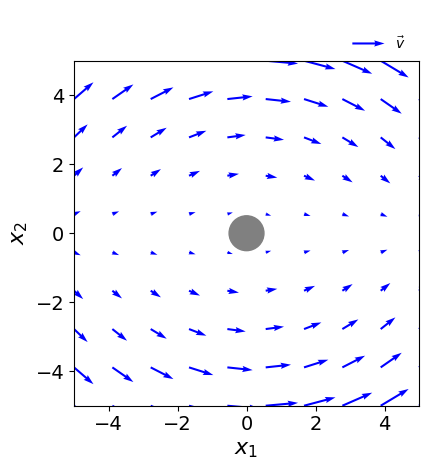

In [5]:
velocity_quiverplot(U0=1,r0=0.5)

Then, we feed the plotting function to [`interact`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) to get some widgets to play with.

In [6]:
interact(velocity_quiverplot,
         U0 = widgets.FloatSlider(min=-5, max=5, value=1, step=0.5, description='U_0'),
         r0 = widgets.FloatSlider(min=0, max=2, value=0.5, step=0.1, description='r_0')
        );

interactive(children=(FloatSlider(value=1.0, description='U_0', max=5.0, min=-5.0, step=0.5), FloatSlider(valu…

## Streamplot

Next, let visualize this flow field looks using [`streamplot`](https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html#sphx-glr-gallery-images-contours-and-fields-plot-streamplot-py).

First we create function to make a plot for a given $U_0$ and $r_0$ value.

In [7]:
def velocity_streamplot(U0,r0):
  # setup a square domain grid for plotting
  w = 5
  a = np.linspace(-w, w, 100)
  x1, x2 = np.meshgrid(a, a)

  # convert domain's grid to polar coordinates
  r = np.sqrt(x1**2 + x2**2)
  th = np.arctan2(x2, x1)

  # evaluate the velocity components on the given domain
  my_vr = vr(r,th,U0,r0)
  my_vth = vth(r,th,U0,r0)

  # convert the polar velocities to Cartesian ones
  v1 = vx_from_polar(r,th,my_vr,my_vth)
  v2 = vy_from_polar(r,th,my_vr,my_vth)

  # compute the velocity vector's magnitude 
  # (used to color the streamlines belows)
  vel = np.sqrt(v1**2 + v2**2)
  
  fig, ax = plt.subplots(tight_layout=True)

  # create a mask on the velocity field for the values of r < r0
  mask = np.zeros(v1.shape, dtype=bool)
  mask[r < r0] = True
  v1[r < r0] = np.nan
  vel[r < r0] = np.nan
  v1 = np.ma.array(v1, mask=mask)
  ax.imshow(~mask, extent=(-w, w, -w, w), alpha=0)
  # cover up the region r < r0 with a circle
  circle = plt.Circle((0, 0), r0*1.01, color='grey', zorder=2)
  ax.add_patch(circle)

  # plot the streamlines
  strm = ax.streamplot(x1, x2, v1, v2, color=vel, linewidth=2, cmap='winter')
  plt.colorbar(strm.lines,label='$\sqrt{v_1^2+v_2^2}$')

  ax.set_ylabel('$x_2$')
  ax.set_xlabel('$x_1$')
  ax.set_aspect('equal')

  plt.show()

First, we make a static plot, with $U_0=1$ and $r_0=0.5$, to make sure it works.

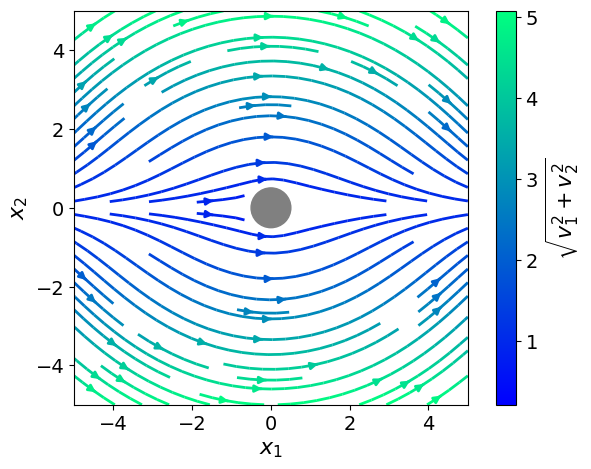

In [8]:
velocity_streamplot(U0=1,r0=0.5)

Then, we feed the plotting function to [`interact`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) to get some widgets to play with.

In [9]:
interact(velocity_streamplot,
         U0 = widgets.FloatSlider(min=-5, max=5, value=1, step=0.5, description='U_0'),
         r0 = widgets.FloatSlider(min=0, max=2, value=0.5, step=0.1, description='r_0')
        );

interactive(children=(FloatSlider(value=1.0, description='U_0', max=5.0, min=-5.0, step=0.5), FloatSlider(valu…